In [0]:
# load extension autoreload
% load_ext autoreload 
# Reload all modules (except those excluded by %aimport) every time before executing the Python code typed.
% autoreload 2 
# plots the desired plot without having to write plt.show
% matplotlib inline 

In [0]:
# importing packages, fastai imports pytorch as well
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
print(torch.cuda.is_available()) # To check if CUDA enabled GPU is available
print(torch.cuda.device_count()) # Number of GPUs
print(torch.cuda.current_device()) # Current GPU index
print(torch.cuda.get_device_name(0)) # GPU name and specs

True
1
0
Tesla P100-PCIE-16GB


In [0]:
bs = 64
# bs = 32
# bs = 16
# Use smaller batch size if GPU runs out of memory


Gonna use the [Oxford-IIIT Pet Dataset](http://www.robots.ox.ac.uk/~vgg/data/pets/) by [O. M. Parhki et al., 2012](http://www.robots.ox.ac.uk/~vgg/publications/2012/parkhi12a/parkhi12a.pdf) which was a collaborative effort of Researchers from Oxford and IIIT-H. It has 12 cat breeds and 25 dog breeds. According to their paper, the best accuracy they could get in 2012 was 59.21%, using a complex model that was specific to pet detection.

In [0]:
# All the datasets whose URLs are available in fastai
dir(URLs)

In [0]:
URLs.PETS

'https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet'

We are going to use the **untar_data** function that we pass a URL as an argument and which will downlaod and extract the data.

In [0]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [0]:
doc(untar_data)

In [0]:
path = untar_data(URLs.PETS);path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [0]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [0]:
# The path object lets us index in this very intuitive way
path_anno = path/'annotations'
path_img = path/'images'


In [0]:
# Getting all the filenames and their paths
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_171.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/boxer_34.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/samoyed_118.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_90.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_132.jpg')]

In [0]:
path_img.ls()

Since the labels are their in the filenames we have to get the labels by using regular expression(regex).

In [0]:

# Random seed
np.random.seed(42)
# Pattern
pat = r'/([^/]+)_\d+.jpg$'

In [0]:
doc(ImageDataBunch)

In [0]:
doc(ImageDataBunch.from_name_re)

In [0]:
# ImageDataBunch makes a databunch 
# ImageDataBunch.from_name_re gets labels from filenames using re
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms = get_transforms(), 
                                   size = 224, bs = bs).normalize(imagenet_stats)

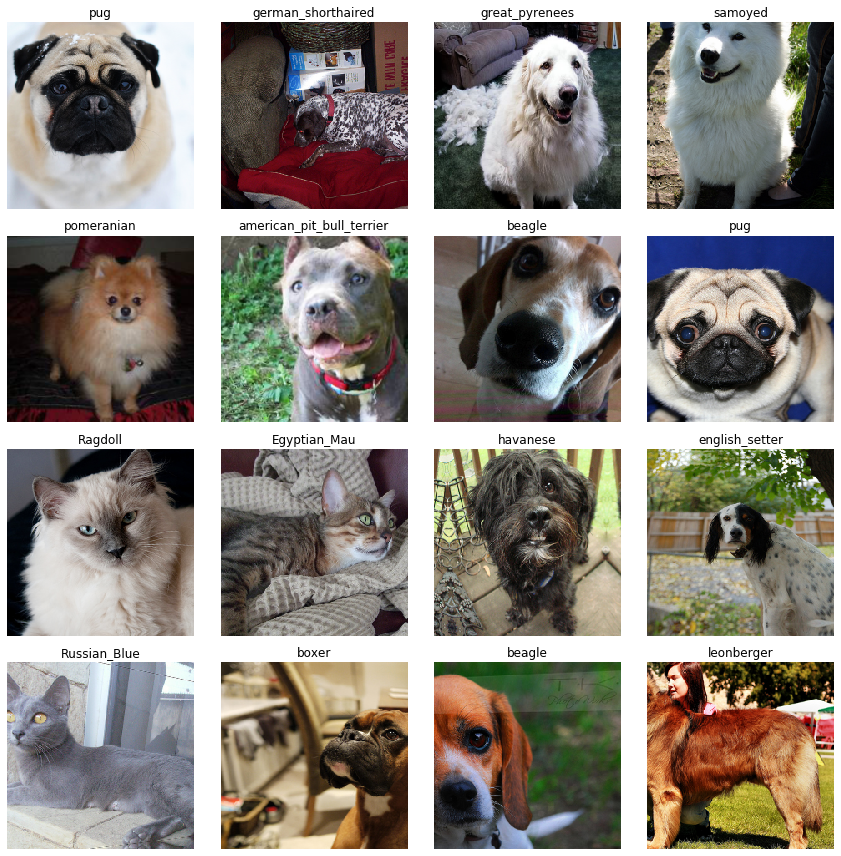

In [0]:
data.show_batch(rows = 4, figsize = (12,12))

In [0]:
print(data.classes)
len(data.classes), data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics = [accuracy, error_rate])

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 152MB/s]


In [0]:
# Print the model
learn.model

In [0]:
learn.summary

In [0]:
# Print the summary 0f the model
learn.summary()

In [0]:
# One cycle learning
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.393618,0.290871,0.895805,0.104195,01:30
1,0.608651,0.257731,0.916103,0.083897,01:29
2,0.393044,0.196336,0.938430,0.061570,01:28
3,0.284796,0.196287,0.938430,0.061570,01:28


In [0]:
# Save the model
learn.save('stage-1', return_path = True)

PosixPath('/root/.fastai/data/oxford-iiit-pet/images/models/stage-1.pth')

In [0]:
ls

sample_data/


In [0]:
! ls

sample_data


In [0]:
doc(learn.save)

In [0]:
# Let's interpret the model and see where is it making mistakes
interp = ClassificationInterpretation.from_learner(learn)
losses, idxs = interp.top_losses()
# Checking len of validaiton dataset and losses and indices vector
len(data.valid_ds) == len(losses)==len(idxs) 


True

In [0]:
len(data.valid_ds)

1478

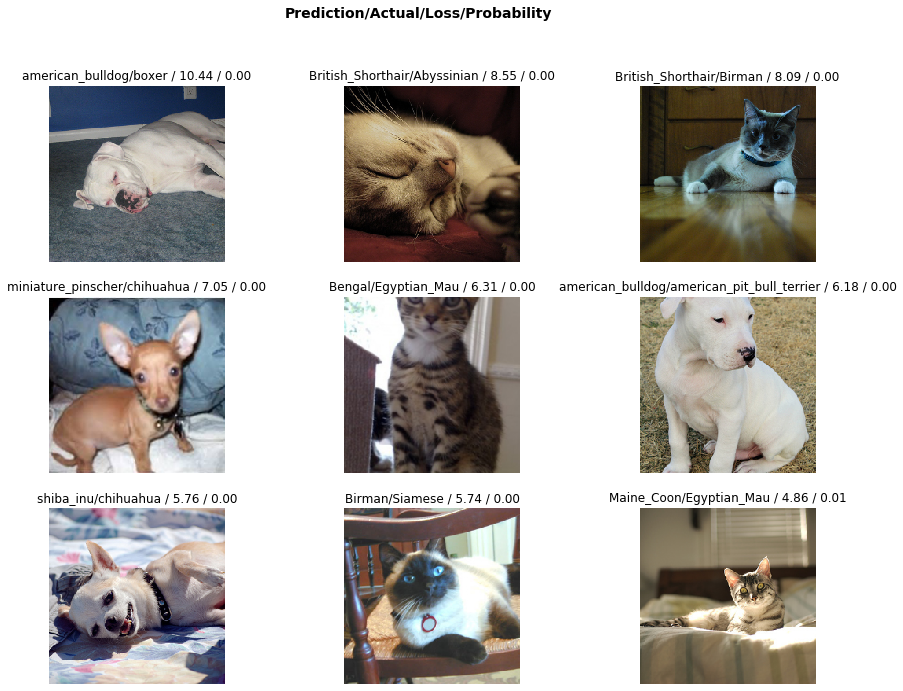

In [0]:
# Plot the interpretations where the model suffers from most loss 
interp.plot_top_losses(9, figsize=(15, 11))

In [0]:
doc(interp.plot_top_losses)

In [0]:
# To check the number of CPUs
import os
print(os.cpu_count())

2


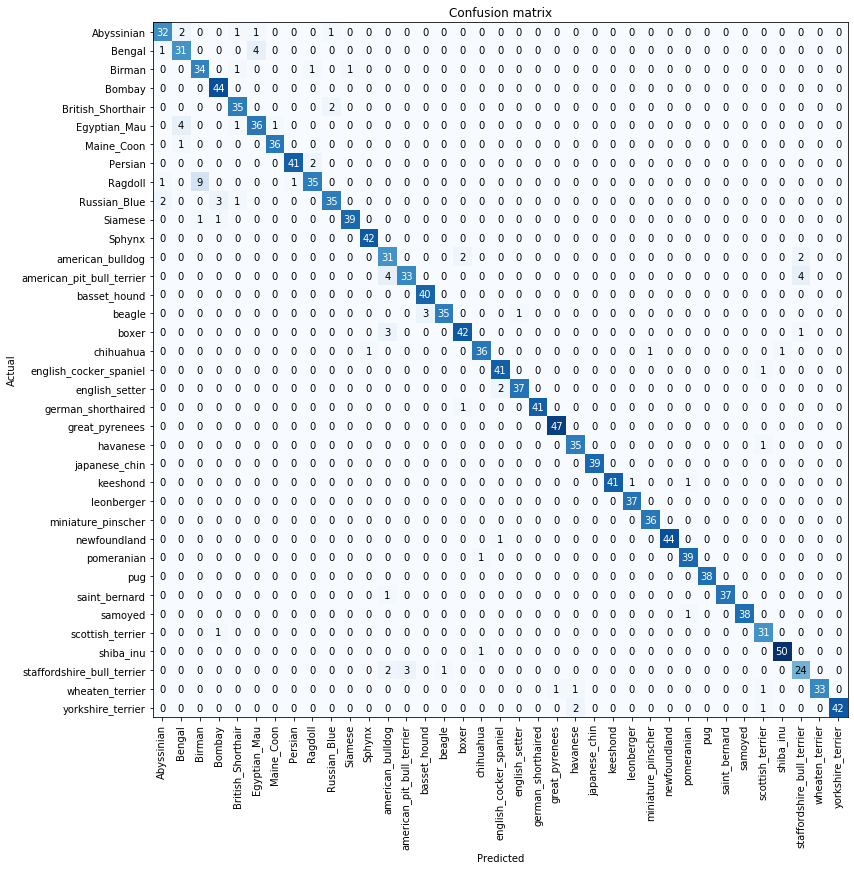

In [0]:
interp.plot_confusion_matrix(figsize=(12,12))

In [0]:
doc(interp.plot_confusion_matrix)

In [0]:
doc(plt.figure)

In [0]:
# Min val argument says to print the confused result only if it got 
# confused atleast as the min_val times
interp.most_confused(min_val=2)

[('Ragdoll', 'Birman', 9),
 ('Bengal', 'Egyptian_Mau', 4),
 ('Egyptian_Mau', 'Bengal', 4),
 ('american_pit_bull_terrier', 'american_bulldog', 4),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 4),
 ('Russian_Blue', 'Bombay', 3),
 ('beagle', 'basset_hound', 3),
 ('boxer', 'american_bulldog', 3),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 3),
 ('Abyssinian', 'Bengal', 2),
 ('British_Shorthair', 'Russian_Blue', 2),
 ('Persian', 'Ragdoll', 2),
 ('Russian_Blue', 'Abyssinian', 2),
 ('american_bulldog', 'boxer', 2),
 ('american_bulldog', 'staffordshire_bull_terrier', 2),
 ('english_setter', 'english_cocker_spaniel', 2),
 ('staffordshire_bull_terrier', 'american_bulldog', 2),
 ('yorkshire_terrier', 'havanese', 2)]

In [0]:
# Unfreeze the convolutional part and train some more
learn.unfreeze()
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.709973,0.351841,0.900541,0.099459,01:33


In [0]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
boxer,samoyed,saint_bernard,Abyssinian,keeshond
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
newfoundland,British_Shorthair,pomeranian,Maine_Coon,wheaten_terrier
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), str

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


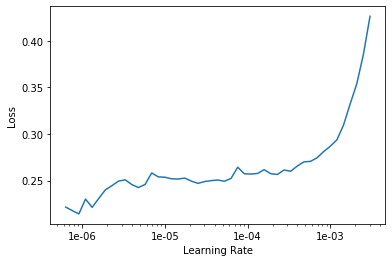

In [0]:
learn.recorder.plot()

In [0]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.244296,0.198791,0.933694,0.066306,01:33
1,0.207533,0.188738,0.937754,0.062246,01:32


In [0]:
# Now let's try with resnet50
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(),
                                   size = 300, bs=bs//2).normalize(imagenet_stats)

In [0]:
learn = cnn_learner(data, models.resnet50, metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 174MB/s]


In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


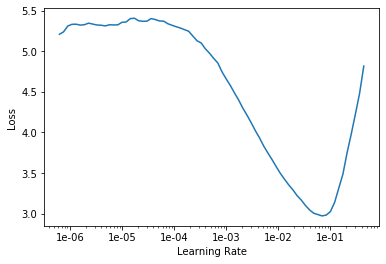

In [0]:
learn.recorder.plot()

In [0]:
doc(learn.fit_one_cycle)

In [0]:
learn.fit_one_cycle(8, max_lr = slice(1e-3, 1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,0.641125,0.280282,0.085927,02:14
1,0.811399,0.707894,0.158322,02:10
2,0.843121,0.887861,0.173884,02:09
3,0.570504,0.451862,0.112314,02:08
4,0.414409,0.270492,0.085250,02:07
5,0.221857,0.217094,0.058187,02:08
6,0.181340,0.212724,0.062923,02:07
7,0.117117,0.203194,0.057510,02:06


In [0]:
learn.save('stage-1-50', return_path = True)

PosixPath('/root/.fastai/data/oxford-iiit-pet/images/models/stage-1-50.pth')

In [0]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-5, 1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.328813,0.450323,0.108931,02:15
1,0.290847,0.234004,0.058187,02:16
2,0.152134,0.193563,0.049391,02:18


In [0]:
learn.fit_one_cycle(3, max_lr = slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.097639,0.190090,0.054127,02:18
1,0.100578,0.183878,0.050744,02:18
2,0.079633,0.184818,0.051421,02:20


In [0]:
learn.load('stage-1-50')

Learner(data=ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300)
y: CategoryList
Maine_Coon,boxer,samoyed,saint_bernard,Abyssinian
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300)
y: CategoryList
great_pyrenees,chihuahua,newfoundland,saint_bernard,chihuahua
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
interp.most_confused(min_val=2)

[('Bengal', 'Egyptian_Mau', 7),
 ('Birman', 'Ragdoll', 6),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 6),
 ('miniature_pinscher', 'chihuahua', 4),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 4),
 ('Maine_Coon', 'Bengal', 3),
 ('basset_hound', 'beagle', 3),
 ('Bengal', 'Maine_Coon', 2),
 ('British_Shorthair', 'Russian_Blue', 2),
 ('Siamese', 'Birman', 2),
 ('american_bulldog', 'staffordshire_bull_terrier', 2),
 ('american_pit_bull_terrier', 'american_bulldog', 2),
 ('american_pit_bull_terrier', 'miniature_pinscher', 2),
 ('beagle', 'american_pit_bull_terrier', 2),
 ('boxer', 'american_bulldog', 2),
 ('chihuahua', 'miniature_pinscher', 2),
 ('staffordshire_bull_terrier', 'american_bulldog', 2)]